<a href="https://colab.research.google.com/github/AsiMrz/AB-Testing/blob/ab-testing/AB_testing_Bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AB Testing on Mobile Game COOKIE CAT

In [1]:
import numpy as np
import math
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from scipy import stats
from IPython.display import display, Latex

Goal of AB testing: Data analysis on the impact on player retention  with an AB-test. 
Variations diffrent Gates in level 30 and level 40.
Sample: 90,189 players
Condition: randomassignmet to to either gate_30 or gate_40.


# Data Introduction

In [2]:
import pandas as pd
import requests
import io

url = 'https://raw.githubusercontent.com/AsiMrz/AB-Testeing/data/cookie_cats.csv' 
# Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

df = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe
df.head()
# Downloading the csv file from your GitHub account

# Reading the downloaded content and turning it into a pandas dataframe

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


Variables:
**userid** a unique number that identifies each player.
**version** whether the player was put in the control group (gate_30 - a gate at level 30) or the test group (gate_40 - a gate at level 40).
**sum_gamerounds** the number of game rounds played by the player during the first week after installation
**retention_1** did the player come back and play 1 day after installing?
**retention_7** did the player come back and play 7 days after installing?

# Bootstraping

# AB Testing variations
In the depicted diagrams, the first day retention is considared as Variation A and the 7 day retention is taken for varain 7.


**Bootstraping**
The basic idea of bootstrapping is that inference about a population from sample data (sample → population) can be modelled by resampling the sample data and performing inference about a sample from resampled data (resampled → sample).
In bootstrap-resamples, the 'population' is in fact the sample, and this is known; hence the quality of inference of the 'true' sample from resampled data (resampled → sample) is measurable. (wikipedia)


In [3]:
# Creating an list with bootstrapped means for each A/B group
# make a function for returning the new DF
import matplotlib.pyplot as plt
boot_1d = []
boot_7d = []
for i in range(500):
    boot_mean_1 = df.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    boot_mean_7 = df.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
    boot_1d.append(boot_mean_1)
    boot_7d.append(boot_mean_7)

In [4]:
# Transforming the list to a DataFrame
boot_1d = pd.DataFrame(boot_1d)
boot_7d = pd.DataFrame(boot_7d)

In [5]:
boot_1d.head(10)

version,gate_30,gate_40
retention_1,0.450179,0.443328
retention_1,0.451143,0.442619
retention_1,0.450468,0.442150
retention_1,0.451186,0.443596
retention_1,0.448902,0.439236
retention_1,0.450739,0.441960
retention_1,0.447064,0.444520
retention_1,0.446209,0.444777
retention_1,0.450335,0.445747
retention_1,0.451244,0.441025


The Bootstrap will give us random selection of the sample but the number of users are the same. 
since the duplicate is allowed, this sampling is called sampling for replacement (ref: datacamp)

In [6]:
#number of userid in the first day in different gates

boot_1d.count()

version
gate_30    500
gate_40    500
dtype: int64

In [7]:
#number of userid after seven days in different gates

boot_7d.count()

version
gate_30    500
gate_40    500
dtype: int64

since the botstrap dataframe's values can be different from the main one we wil have a different mean.

The average squared deviation is typically calculated as x.sum() / N, where N = len(x). If, however, ddof is specified, the divisor N - ddof is used instead. In standard statistical practice, ddof=1 provides an unbiased estimator of the variance of the infinite population. ddof=0 provides a maximum likelihood estimate of the variance for normally distributed variables. The standard deviation computed in this function is the square root of the estimated variance, so even with ddof=1, it will not be an unbiased estimate of the standard deviation per se.
ref: https://numpy.org/doc/stable/reference/generated/numpy.std.html#:~:text=The%20standard%20deviation%20is%20the,N%20%3D%20len(x)%20.

In [ ]:
# calculating the diviation

**Bootstrapping**
1. make a Bootstrap dataset.
2. calculations (e.g. mean)
3. Keep track of calculation.
4. Repeating the previous 3 steps several times.

Why boostrapping?

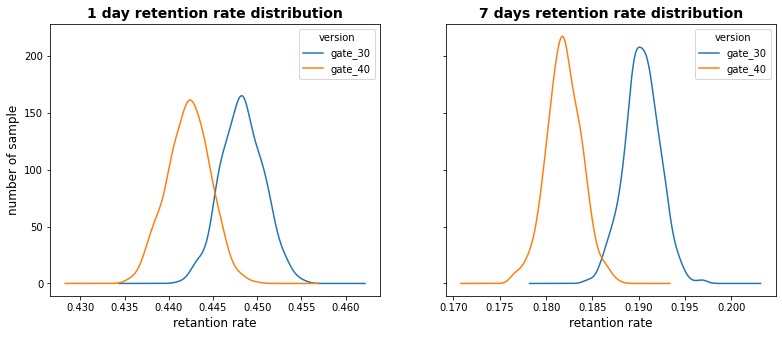

In [ ]:

    


# Kernel Density Estimate plot of the bootstrap distributions
fig, (ax1,ax2) = plt.subplots(1, 2, sharey=True, figsize=(13,5))

boot_1d.plot.kde(ax=ax1)
ax1.set_xlabel("retantion rate",size=12)
ax1.set_ylabel("number of sample",size=12)
ax1.set_title("1 day retention rate distribution", fontweight="bold",size=14)
boot_7d.plot.kde(ax=ax2)
ax2.set_xlabel("retantion rate",size=12)
ax2.set_title("7 days retention rate distribution", fontweight="bold",size=14)
plt.show()